In [20]:
import pandas as pd

In [24]:
lidrekon_df = pd.read_csv('lidrekon_ORIGINAL.csv', encoding='cp1251', delimiter=";")
lidrekon_df = lidrekon_df.rename(columns={rus:en for rus,en in zip(lidrekon_df.columns, ['No.', 'Date', 'Description'])})
lidrekon_df = lidrekon_df.drop('No.', axis=1, inplace=False)
print(lidrekon_df)

                     Date                                        Description
0     2024-04-27 02:33:20  Музыкальная композиция "SKVERNA", продолжитель...
1     2024-03-11 12:46:18  Информационный материал – публикация (статья) ...
2     2024-03-11 12:45:09  Листовка "Исполнительного комитета Совета наро...
3     2024-01-15 04:04:18  Музыкальная композиция "i..ш русню", продолжит...
4     2023-12-28 01:19:07  Текстовый материал "Протокол регистрации прест...
...                   ...                                                ...
5341  2013-01-19 07:23:28  Кинофильм "Вечный жид", решение вынесено Тихви...
5342  2013-01-19 07:23:28  Печатные материалы в газете "Для русских людей...
5343  2013-01-19 07:23:28  Письма Рады земли Кубанской духовно-родовой де...
5344  2013-01-19 07:23:28  Книга "Книга единобожия", автор - Мухаммад ибн...
5345  2013-01-19 07:22:43  Музыкальный альбом "Музыка белых", автор - Муз...

[5346 rows x 2 columns]


In [25]:
lidrekon_df.loc[lidrekon_df['Description'].isnull(), :]
print(len(lidrekon_df))
lidrekon_df = lidrekon_df.loc[~lidrekon_df['Description'].isnull(), :]
print(len(lidrekon_df))

5346
5343


In [26]:
def find_titles(x):
    if len(x)==0:
        return [None]
    elif len(x)==1:
        return x
    else:
        return [x[i] for i in range(len(x)) if i%2==1]
lidrekon_df['TitleCandidates'] = lidrekon_df['Description'].str.split('"').apply(find_titles)
lidrekon_df['Title'] = lidrekon_df['TitleCandidates'].apply(lambda x: x[0])

In [27]:
print(lidrekon_df.head().to_string())

                  Date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Description                                                                                                                                                                                                                                                                                                                                                                                                                                                      TitleCandid

0                                              SKVERNA
1    К десятилетию Кёнделенского противостояния 14-...
2    Исполнительного комитета Совета народных депут...
3                                           i..ш русню
4    Протокол регистрации преступления на территори...
4
4
9
25
35
62


<Axes: ylabel='Frequency'>

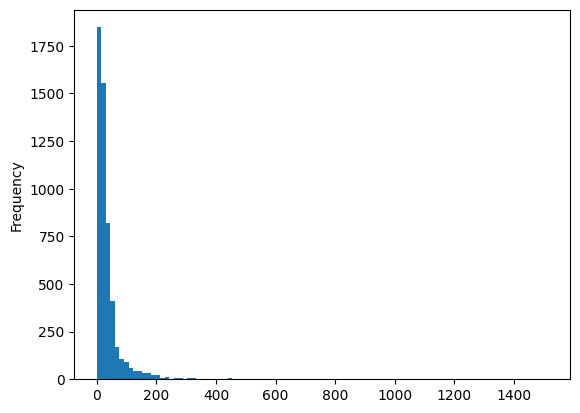

In [29]:
print(lidrekon_df.head()['Title'].to_string())

def try_len(x):
    try:
        return len(x)
    except:
        return 0

lengths = lidrekon_df['Title'].apply(try_len)
print(len(lengths.loc[lengths==0]))
print(len(lengths.loc[lengths==1]))
print(len(lengths.loc[lengths==2]))
print(len(lengths.loc[lengths==3]))
print(len(lengths.loc[lengths==4]))
print(len(lengths.loc[lengths==5]))
lengths.plot.hist(bins=100)

In [30]:
lidrekon_df.to_csv('lidrekon.csv')